<a href="https://colab.research.google.com/github/Jpsama1236/ML_algorithms/blob/main/Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [4]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [5]:
df=df.iloc[:,2:]

In [6]:
df.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [8]:
X=df.iloc[:,:2]

In [11]:
y=df.iloc[:,2]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [16]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [23]:
x_train_scaled=scaler.transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [24]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=X_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=X_test.columns)

In [25]:
x_train_scaled.head(2)

,Age,EstimatedSalary
0,0.022734,-0.263890
1,0.794317,-1.420262


In [26]:
scaler.mean_

array([3.77642857e+01, 6.99000000e+04])

In [27]:
x_train_scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,2.030122e-16,1.268826e-17
std,1.001791e+00,1.001791e+00
min,-1.906223e+00,-1.627816e+00
25%,-7.488487e-01,-7.753624e-01
50%,-7.371372e-02,1.779034e-02
75%,7.943170e-01,5.070247e-01
max,2.144587e+00,2.375011e+00


In [28]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.764286,69900.000000
std,10.386862,33786.553284
min,18.000000,15000.000000
25%,30.000000,43750.000000
50%,37.000000,70500.000000
75%,46.000000,87000.000000
max,60.000000,150000.000000


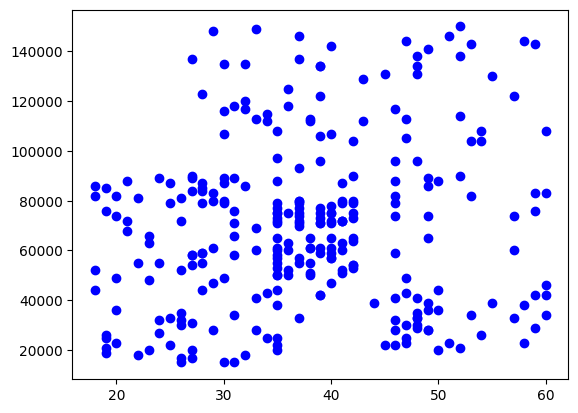

In [47]:


ax1=plt.scatter(X_train['Age'],X_train['EstimatedSalary'],color='blue')

plt.show()


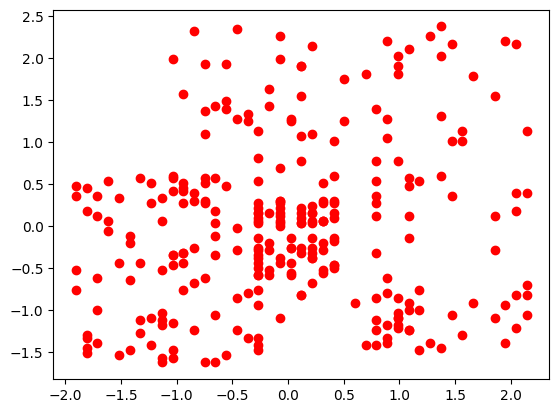

In [45]:
ax2=plt.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')

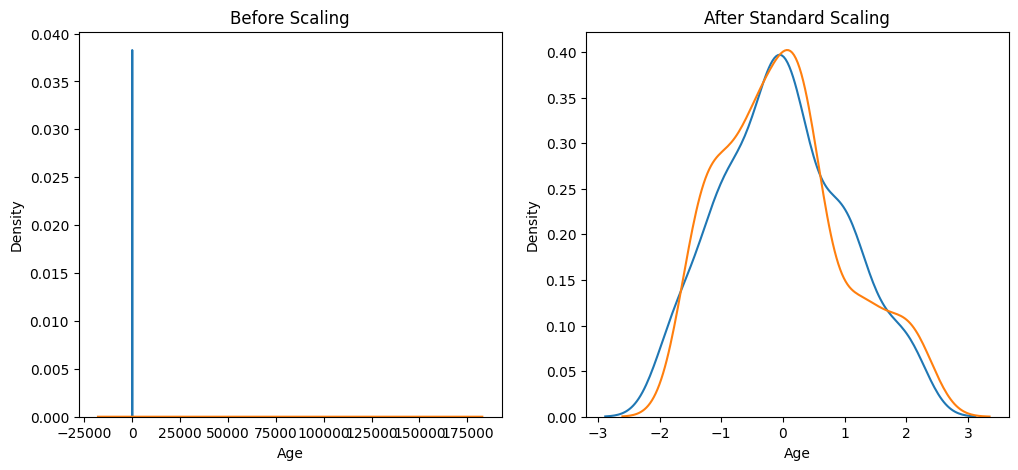

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

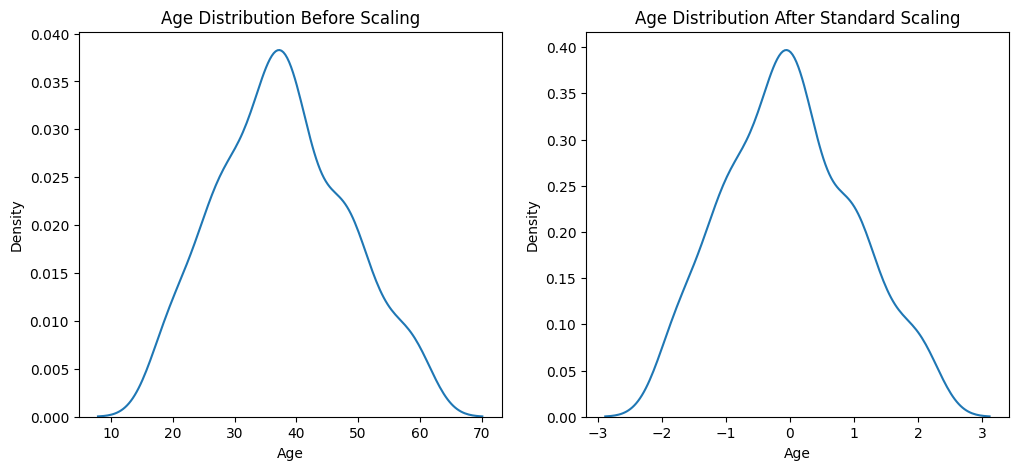

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

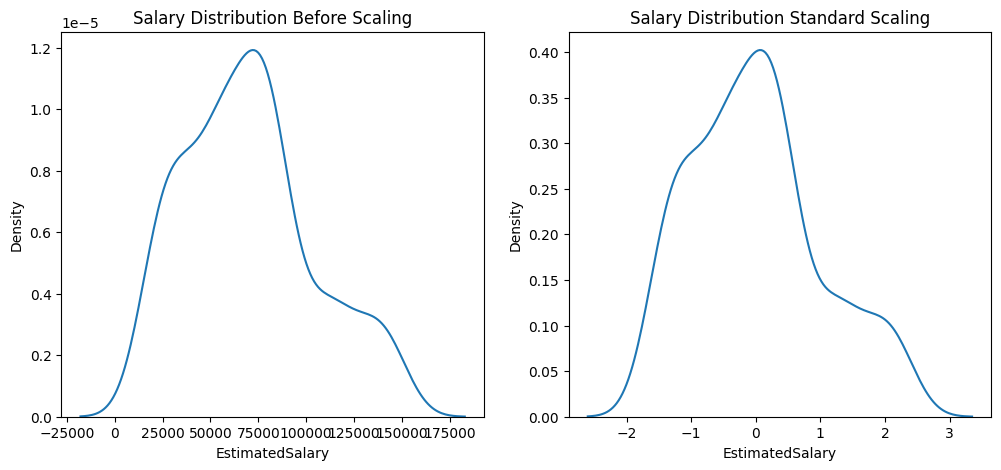

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [51]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [54]:
model1=lr.fit(X_train,y_train)
model2=lr_scaled.fit(x_train_scaled,y_train)

In [56]:
y_pred = lr.predict(X_test_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [57]:
from sklearn.metrics import accuracy_score


In [58]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6416666666666667
Scaled 0.8416666666666667


In [59]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

<ipython-input-59-7966e07e892a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [60]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


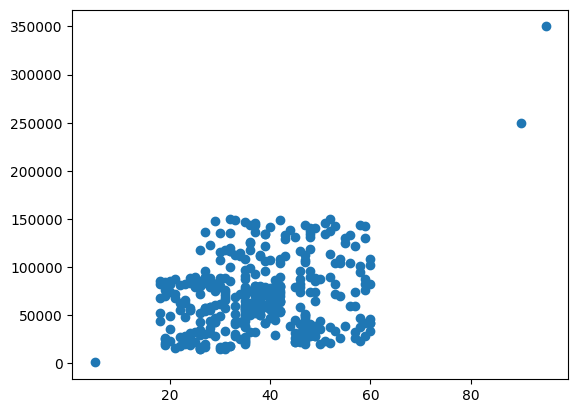

In [61]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

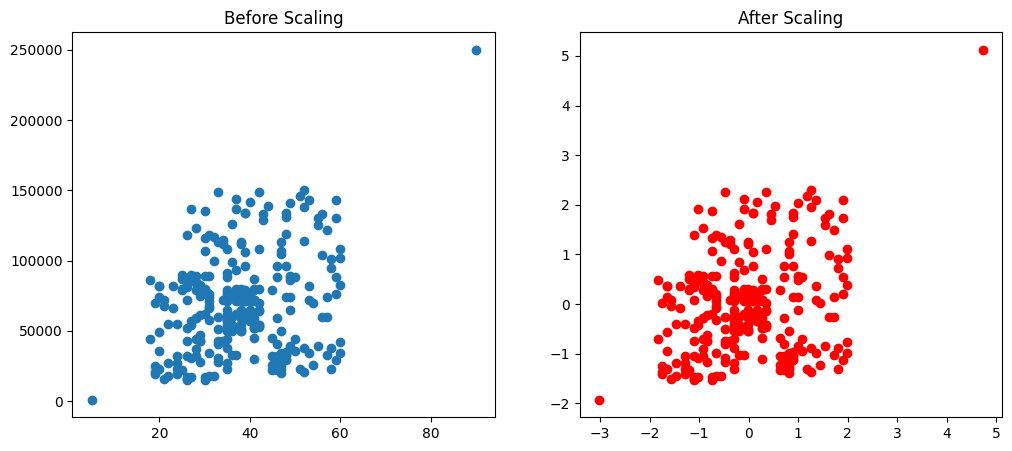

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()